# Deep Learning - 2024 / 2025

Grupo 3 - Bruno Miguel Marques Pereira

# Dependências

In [1]:
#! pip install tensorflow-datasets

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import tensorflow_datasets as tfds # to import the dataset

# Funções auxiliares /código

Fornecidas nas aulas

In [5]:
def count_n_images_iterator(this_iterator, name, what='images'):
    """
    Function to count the number of items (images/batches) in the dataset that
    is an iterator. Does not return. Prints a string.


    Input:
        this_iterator: tf.data.Dataset
            Iterator containing the data. TensorFlow Dataset.
        name: str
            Name of the dataset. Should be 'train','test','validation'
        what: str
            Specifies if we are dealing with single images or batches. Should
            be 'images' or 'batches'.

    Output:
        None
    """

    count_items = 0
    for item, label in this_iterator:
        count_items += 1

    print(f'The {name} dataset has {count_items} {what}.')

In [6]:
def plot_acuracy_loss(history):
    """
    Adapted from: https://www.tensorflow.org/tutorials/images/classification
    """
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

# Carregar os dados

Considerar aumentar o número de splits

In [7]:
split0, split1, split2 = tfds.even_splits('train', n=3)

In [8]:
ds_train, ds_info = tfds.load(
    'deep_weeds',
    split=split0,
    shuffle_files=False,
    as_supervised=True,
    with_info=True,
    )

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/deep_weeds/incomplete.KFGT0Z_3.0.0/deep_weeds-train.tfrecord*...:   0%|   …

Dataset deep_weeds downloaded and prepared to /root/tensorflow_datasets/deep_weeds/3.0.0. Subsequent calls will reuse this data.


In [9]:
ds_test, test_info = tfds.load(
    'deep_weeds',
    split=split1,
    shuffle_files=False,
    as_supervised=True,
    with_info=True,
    )

In [10]:
ds_val, __ = tfds.load(
    'deep_weeds',
    split=split2,
    shuffle_files=False,
    as_supervised=True,
    with_info=True,
    )

## Informação dos dados

In [99]:
print(ds_info)

tfds.core.DatasetInfo(
    name='deep_weeds',
    full_name='deep_weeds/3.0.0',
    description="""
    The DeepWeeds dataset consists of 17,509 images capturing eight different weed species native to Australia in situ with neighbouring flora.The selected weed species are local to pastoral grasslands across the state of Queensland.The images were collected from weed infestations at the following sites across Queensland: "Black River", "Charters Towers",  "Cluden", "Douglas", "Hervey Range", "Kelso", "McKinlay" and "Paluma".
    """,
    homepage='https://github.com/AlexOlsen/DeepWeeds',
    data_dir='/root/tensorflow_datasets/deep_weeds/3.0.0',
    file_format=tfrecord,
    download_size=469.32 MiB,
    dataset_size=469.99 MiB,
    features=FeaturesDict({
        'image': Image(shape=(256, 256, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=9),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False

## Explorar os dados

In [165]:
count_n_images_iterator(ds_train, 'train'),
count_n_images_iterator(ds_test, 'test'),
count_n_images_iterator(ds_val, 'validation')

The train dataset has 5837 images.
The test dataset has 5836 images.
The validation dataset has 5836 images.


In [101]:
labels = {}
for example in ds_train:
    image, label = example
    simple_label = label.numpy()
    if int(simple_label) not in labels.keys():
      labels[int(simple_label)] = 1
    else:
      labels[int(simple_label)] += 1

for label in sorted(labels.keys()):
  print(f'{label}: {labels[label]}')

0: 340
1: 370
2: 339
3: 381
4: 347
5: 332
6: 362
7: 310
8: 3056


In [102]:
labels_test = {}
for example in ds_test:
    image, label = example
    simple_label = label.numpy()
    if int(simple_label) not in labels_test.keys():
      labels_test[int(simple_label)] = 1
    else:
      labels_test[int(simple_label)] += 1

for label in sorted(labels_test.keys()):
  print(f'{label}: {labels_test[label]}')

0: 396
1: 341
2: 352
3: 310
4: 333
5: 330
6: 365
7: 342
8: 3067


In [103]:
for i in range(ds_info.features['label'].num_classes):
  print(f"Class number {i}: {ds_info.features['label'].int2str(i)} --> {labels[i]}")

Class number 0: Chinee apple --> 340
Class number 1: Lantana --> 370
Class number 2: Parkinsonia --> 339
Class number 3: Parthenium --> 381
Class number 4: Prickly acacia --> 347
Class number 5: Rubber vine --> 332
Class number 6: Siam weed --> 362
Class number 7: Snake weed --> 310
Class number 8: Negative --> 3056


In [104]:
for i in range(test_info.features['label'].num_classes):
  print(f"Class number {i}: {test_info.features['label'].int2str(i)} --> {labels[i]}")

Class number 0: Chinee apple --> 340
Class number 1: Lantana --> 370
Class number 2: Parkinsonia --> 339
Class number 3: Parthenium --> 381
Class number 4: Prickly acacia --> 347
Class number 5: Rubber vine --> 332
Class number 6: Siam weed --> 362
Class number 7: Snake weed --> 310
Class number 8: Negative --> 3056


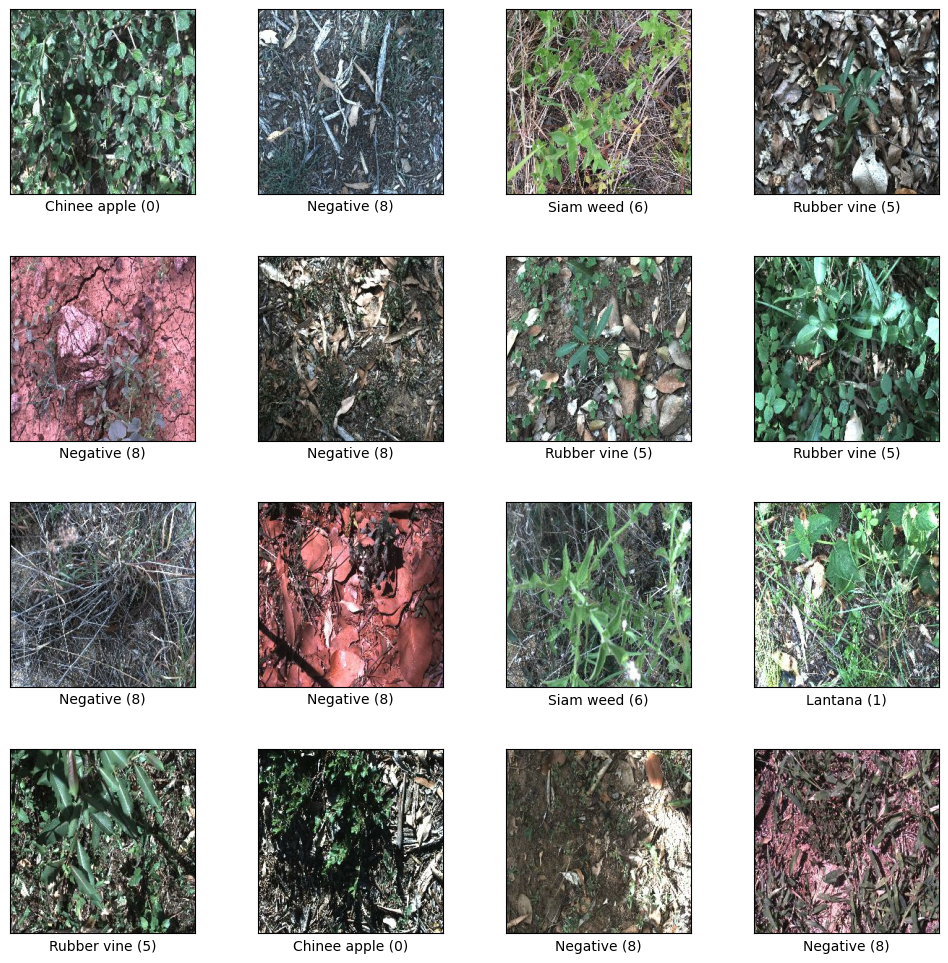

In [105]:
fig = tfds.show_examples(ds_test, test_info, rows=4, cols=4)

O dataset contém imagens com a mesma largura e altura (256x256).

O dataset tem cor, daí os 3 canais (256,256,3).

O dataset é muito grande por isso vai ser escolhido apenas um subset.

# Transformar os dados

## Uma amostra apenas

In [11]:
sub_ds_train = ds_train.take(1000)
sub_ds_test = ds_test.take(200)
sub_ds_val = ds_val.take(500)

In [287]:
count_n_images_iterator(sub_ds_train, 'train'),
count_n_images_iterator(sub_ds_test, 'test'),
count_n_images_iterator(sub_ds_val, 'validation')

The train dataset has 1000 images.
The test dataset has 200 images.
The validation dataset has 500 images.


## Normalizar os dados

In [12]:
def normalize_image(image, label):
    return tf.cast(image, tf.float32) /255.0, label

In [289]:
for image, label in ds_train.take(1):
    print("Min:", tf.reduce_min(image).numpy())
    print("Max:", tf.reduce_max(image).numpy())

Min: 0
Max: 255


In [13]:
normalize_ds_train = sub_ds_train.map(normalize_image)
normalize_ds_test = sub_ds_test.map(normalize_image)
normalize_ds_val = sub_ds_val.map(normalize_image)

## Redimensionar as imagens

In [14]:
def resize_image(image, label, target_height=128, target_width=128):
    return tf.image.resize_with_pad(image, target_height, target_width), label

In [15]:
resized_ds_train = normalize_ds_train.map(resize_image)
resized_ds_test = normalize_ds_test.map(resize_image)
resized_ds_val = normalize_ds_val.map(resize_image)

In [293]:
count_n_images_iterator(resized_ds_train, 'train'),
count_n_images_iterator(resized_ds_test, 'test'),
count_n_images_iterator(resized_ds_val, 'validation')

The train dataset has 1000 images.
The test dataset has 200 images.
The validation dataset has 500 images.


## Dados após a transformação

Perderam alguma qualidade

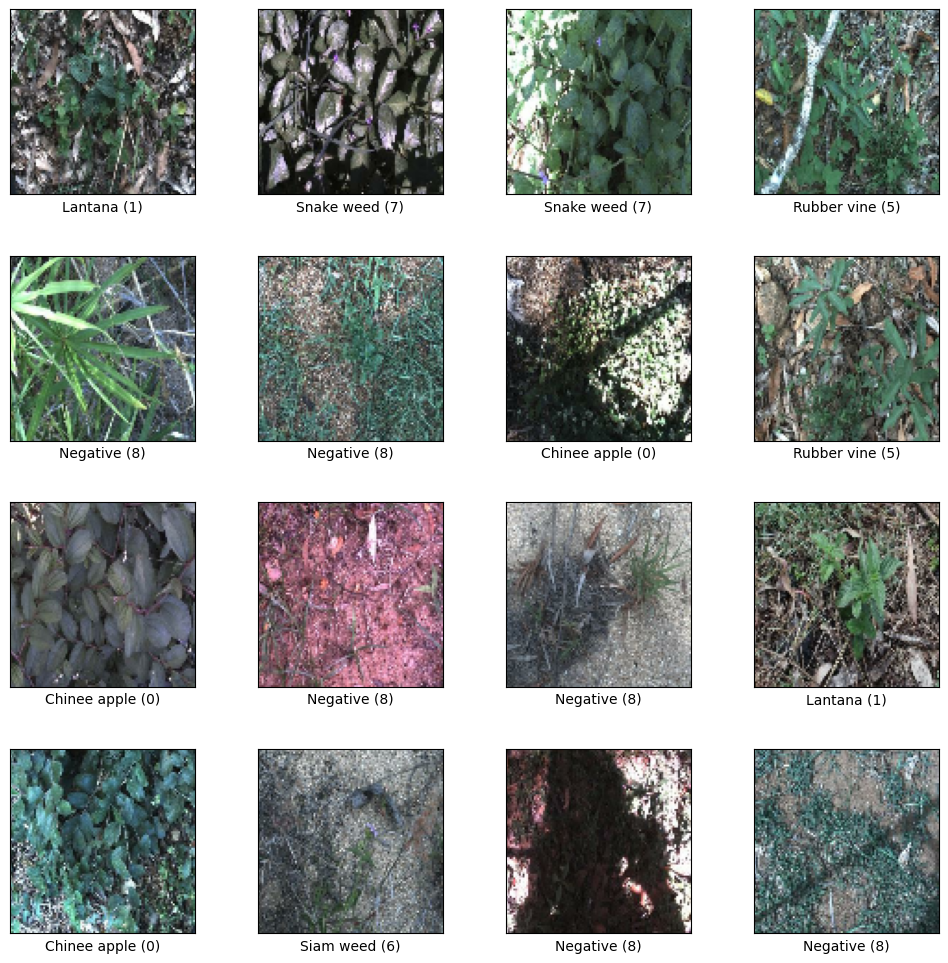

In [21]:
fig = tfds.show_examples(resized_ds_train, ds_info, rows=4, cols=4)

## Definição do batch

A quantidade de imagens a serem analisadas de cada vez

In [242]:
#resized_ds_train = resized_ds_train.batch(256) # depende da memoria disponiveis na maquina, numero maior representa mais dados em memoria
#resized_ds_test = resized_ds_test.batch(256) # depende da memoria disponiveis na maquina, numero maior representa mais dados em memoria
#resized_ds_val = resized_ds_val.batch(256) # depende da memoria disponiveis na maquina, numero maior representa mais dados em memoria

resized_ds_train_norm = normalize_ds_train.batch(128) # depende da memoria disponiveis na maquina, numero maior representa mais dados em memoria
resized_ds_test_norm = normalize_ds_test.batch(128) # depende da memoria disponiveis na maquina, numero maior representa mais dados em memoria
resized_ds_val_norm = normalize_ds_val.batch(128) # depende da memoria disponiveis na maquina, numero maior representa mais dados em memoria

In [16]:
resized_ds_train = resized_ds_train.batch(128)
resized_ds_test = resized_ds_test.batch(128)
resized_ds_val = resized_ds_val.batch(128)

In [272]:
count_n_images_iterator(resized_ds_train_norm, 'train', 'batches'), # nao sao imagens, sao batches (grupos) de imagens
count_n_images_iterator(resized_ds_test_norm, 'test', 'batches'), # nao sao imagens, sao batches (grupos) de imagens
count_n_images_iterator(resized_ds_val_norm, 'validation', 'batches') # nao sao imagens, sao batches (grupos) de imagens

The train dataset has 8 batches.
The test dataset has 2 batches.
The validation dataset has 4 batches.


# Problem definition

O problema é classificar 1 de 9 classes
Problema multi-classe que precisa de uma layer final com uma função de ativação softmax.

## Métrica

Usar a accuracy para perceber se estamos a acertar nas classes que estamos prever.

# Modeling

## Baseline model

In [113]:
baseline_model = Sequential([
  layers.Input(shape=(256, 256, 3)),
  layers.Flatten(),
  layers.Dense(300, activation='relu'),
  layers.Dense(100, activation='relu'),
  layers.Dense(10, activation='relu'),
  layers.Dense(9, activation='softmax')
])

In [114]:
baseline_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [115]:
baseline_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 196608)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 300)            │    58,982,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 9)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,013,909 (225.12 MB)

 Trainable params: 59,013,909 (225.12 MB)

 Non-trainable params: 0 (0.00 B)

In [116]:
epochs=20
history = baseline_model.fit(
  resized_ds_train,
  validation_data=resized_ds_val,
  epochs=epochs
)

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.1372 - loss: 20.0056 - val_accuracy: 0.5300 - val_loss: 2.1947
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.5400 - loss: 2.1937 - val_accuracy: 0.5300 - val_loss: 2.1907
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.5400 - loss: 2.1893 - val_accuracy: 0.5300 - val_loss: 2.1858
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.5400 - loss: 2.1842 - val_accuracy: 0.5300 - val_loss: 2.1805
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.5400 - loss: 2.1789 - val_accuracy: 0.5300 - val_loss: 2.1751
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.5400 - loss: 2.1734 - val_accuracy: 0.5300 - val_loss: 2.1697
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.5400 - loss: 2.1679 - val_accuracy: 0.5300 - val_loss: 2.1642
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.5400 - loss: 2.1624 - val_accuracy: 0.5300 - val_loss: 2.1587
Epoch 9

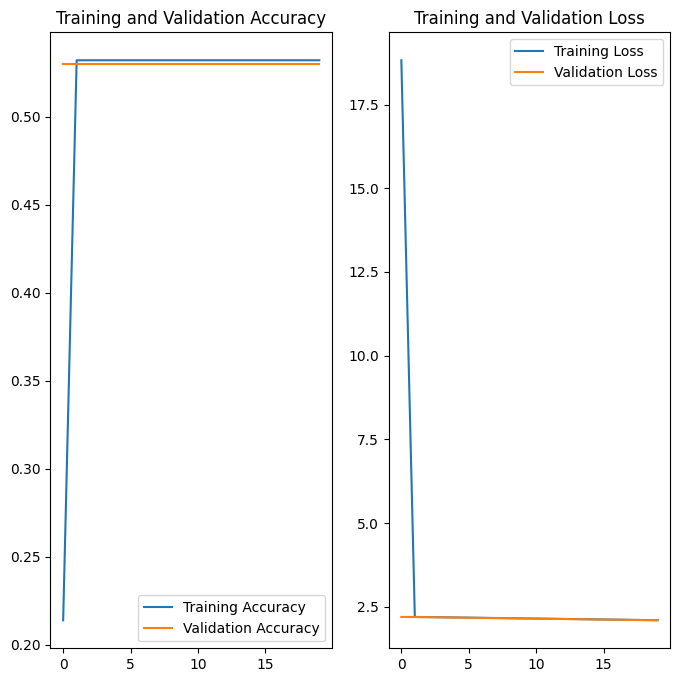

In [117]:
plot_acuracy_loss(history)

Este modelo não atinge mais de 54% de accuracy sendo que se mantém estático logo após atualizar os pesos nas primeiras epochs. Tanto a accuracy no validation como a loss se mantiveram estáticos. O modelo acaba por não conseguir extrair mais significado dos dados.

## CNN model

In [118]:
cnn_model = Sequential([
  layers.Input(shape=(256, 256, 3)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(9, activation='softmax')
])

In [119]:
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [120]:
cnn_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 524288)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 9)              │     4,718,601 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,719,497 (18.00 MB)

 Trainable params: 4,719,497 (18.00 MB)

 Non-trainable params: 0 (0.00 B)

In [121]:
epochs=20
history = cnn_model.fit(
  resized_ds_train,
  validation_data=resized_ds_val,
  epochs=epochs
)

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 60s 7s/step - accuracy: 0.2953 - loss: 36.0718 - val_accuracy: 0.0500 - val_loss: 62.7480
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 60s 7s/step - accuracy: 0.1724 - loss: 46.7692 - val_accuracy: 0.5300 - val_loss: 31.8510
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 54s 7s/step - accuracy: 0.5400 - loss: 25.3024 - val_accuracy: 0.5300 - val_loss: 9.2372
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 80s 6s/step - accuracy: 0.4599 - loss: 5.4073 - val_accuracy: 0.0950 - val_loss: 3.6957
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 82s 7s/step - accuracy: 0.2749 - loss: 2.3309 - val_accuracy: 0.4200 - val_loss: 1.7817
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 51s 7s/step - accuracy: 0.6243 - loss: 1.3765 - val_accuracy: 0.5300 - val_loss: 1.7611
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 82s 6s/step - accuracy: 0.5510 - loss: 1.3427 - val_accuracy: 0.5300 - val_loss: 1.6528
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 87s 7s/step - accuracy: 0.6303 - loss: 1.1870 - val_accuracy: 0.5400 - val_loss: 1.5875
Epo

In [122]:
plot_acuracy_loss(history)

O modelo está já a fazer overfitting pois não está a aumentar a accuracy do validation set como o de treino. Como se pode ver é atingido cerca de 98% accuracy enquanto que no validation não se sai dos 50%. A loss também acaba por ficar acima do treino. Demorou ainda algum tempo a correr pelo que vou redimensionar as imagens para conseguir fazer mais testes

## Increasing the network of the CNN model -> increasing complexity

In [243]:
resized_ds_train = normalize_ds_train.map(resize_image)
resized_ds_test = normalize_ds_test.map(resize_image)
resized_ds_val = normalize_ds_val.map(resize_image)

In [244]:
resized_ds_train = resized_ds_train.batch(128)
resized_ds_test = resized_ds_test.batch(128)
resized_ds_val = resized_ds_val.batch(128)

In [245]:
cnn_model_deep = Sequential([
  layers.Input(shape=(128, 128, 3)),
  layers.Conv2D(8, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(32, activation='relu'),
  layers.Dense(16, activation='relu'),
  layers.Dense(9, activation='softmax')
])
cnn_model_deep.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [246]:
cnn_model_deep.summary()

Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_58 (Conv2D)              │ (None, 128, 128, 8)    │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_58 (MaxPooling2D) │ (None, 64, 64, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_59 (Conv2D)              │ (None, 64, 64, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_59 (MaxPooling2D) │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_60 (Conv2D)              │ (None, 32, 32, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_60 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_27 (Flatten)            │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_87 (Dense)                │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_88 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_89 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_90 (Dense)                │ (None, 9)              │           153 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,059,545 (4.04 MB)

 Trainable params: 1,059,545 (4.04 MB)

 Non-trainable params: 0 (0.00 B)

In [247]:
epochs=30
history = cnn_model_deep.fit(
  resized_ds_train,
  validation_data=resized_ds_val,
  epochs=epochs
)

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.2762 - loss: 2.0225 - val_accuracy: 0.5160 - val_loss: 1.7765
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.5400 - loss: 1.7392 - val_accuracy: 0.5160 - val_loss: 1.7411
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.5400 - loss: 1.6671 - val_accuracy: 0.5160 - val_loss: 1.6978
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.5400 - loss: 1.6191 - val_accuracy: 0.5160 - val_loss: 1.6450
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.5400 - loss: 1.5887 - val_accuracy: 0.5160 - val_loss: 1.6741
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.5400 - loss: 1.5614 - val_accuracy: 0.5160 - val_loss: 1.6265
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.5400 - loss: 1.5358 - val_accuracy: 0.5140 - val_loss: 1.5698
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.5446 - loss: 1.5323 - val_accuracy: 0.5160 - val_loss: 1.5102
Epoch 9/

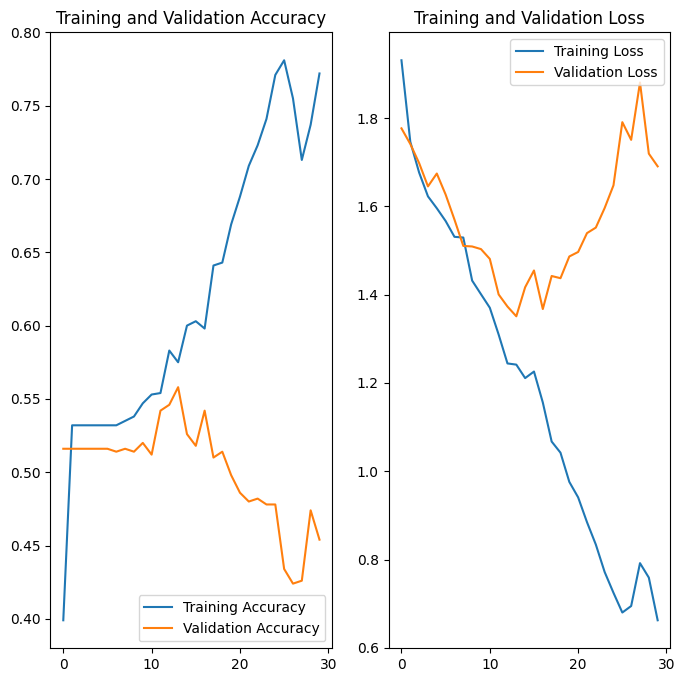

In [249]:
plot_acuracy_loss(history)

Aumentou o overfit no sentido em que a accuracy no validation se deteriorou ainda mais com o passar do tempo, bem como a loss no validation que acabou por
aumentar o gap com o training set. Apesar de tudo, o modelo mais simples acabou por criar um overfit melhor em termos de accuracy pelo que criar-se-á uma nova iteração no CNN básico

## Increasing complexity on CNN basic

In [182]:
cnn_model_base_complex = Sequential([
  layers.Input(shape=(128, 128, 3)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(32, activation='relu'),
  layers.Dense(9, activation='softmax')
])
cnn_model_base_complex.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [185]:
cnn_model_base_complex.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_33 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 64)             │     4,194,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 9)              │           297 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,648,413 (48.25 MB)

 Trainable params: 4,216,137 (16.08 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,432,276 (32.17 MB)

In [183]:
epochs=20
history = cnn_model_base_complex.fit(
  resized_ds_train,
  validation_data=resized_ds_val,
  epochs=epochs
)

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 42s 5s/step - accuracy: 0.4040 - loss: 2.0972 - val_accuracy: 0.5300 - val_loss: 1.6945
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 31s 4s/step - accuracy: 0.5400 - loss: 1.6366 - val_accuracy: 0.5300 - val_loss: 1.6151
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.5400 - loss: 1.5767 - val_accuracy: 0.5300 - val_loss: 1.5666
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 45s 4s/step - accuracy: 0.5400 - loss: 1.5077 - val_accuracy: 0.5350 - val_loss: 1.5255
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 31s 4s/step - accuracy: 0.5485 - loss: 1.4475 - val_accuracy: 0.5350 - val_loss: 1.4910
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step - accuracy: 0.5673 - loss: 1.3882 - val_accuracy: 0.5450 - val_loss: 1.4522
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step - accuracy: 0.5871 - loss: 1.3112 - val_accuracy: 0.5400 - val_loss: 1.4129
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 31s 4s/step - accuracy: 0.6148 - loss: 1.2016 - val_accuracy: 0.5350 - val_loss: 1.4097
Epoch 9/

In [184]:
plot_acuracy_loss(history)

Aqui podemos avaliar novamente um overfit mais acentuado mantendo a accuracy que tinhamos no modelo CNN base, partindo então deste modelo vamos incluir algumas operações para reduzir o overfit como regularização com dropout e com a norma L2.

## Regularization with dropout

### Dropout 0.01

In [186]:
drop_out_model = Sequential([
  layers.Input(shape=(128, 128, 3)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.01),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.01),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dropout(0.01),
  layers.Dense(32, activation='relu'),
  layers.Dropout(0.01),
  layers.Dense(9, activation='softmax')
])

In [187]:
drop_out_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [188]:
drop_out_model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_35 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_36 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 64)             │     4,194,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 9)              │           297 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,216,137 (16.08 MB)

 Trainable params: 4,216,137 (16.08 MB)

 Non-trainable params: 0 (0.00 B)

In [189]:
epochs=20
history = drop_out_model.fit(
  resized_ds_train,
  validation_data=resized_ds_val,
  epochs=epochs
)

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 37s 4s/step - accuracy: 0.3943 - loss: 1.8792 - val_accuracy: 0.5300 - val_loss: 1.6458
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 32s 4s/step - accuracy: 0.5409 - loss: 1.5970 - val_accuracy: 0.5400 - val_loss: 1.6051
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 43s 4s/step - accuracy: 0.5412 - loss: 1.4944 - val_accuracy: 0.5350 - val_loss: 1.5568
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 33s 4s/step - accuracy: 0.5549 - loss: 1.4284 - val_accuracy: 0.5250 - val_loss: 1.5510
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.5862 - loss: 1.3300 - val_accuracy: 0.5350 - val_loss: 1.4884
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 33s 4s/step - accuracy: 0.6059 - loss: 1.2119 - val_accuracy: 0.5400 - val_loss: 1.4432
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.6455 - loss: 1.0780 - val_accuracy: 0.5200 - val_loss: 1.4488
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 32s 4s/step - accuracy: 0.6822 - loss: 0.9656 - val_accuracy: 0.5150 - val_loss: 1.5233
Epoch 9/

In [190]:
plot_acuracy_loss(history)

Parece ter regularizado no final do treino do modelo. Além disso manteve-se o aumento do gap entre o validation e o training. Aumentar o dropout para perceber o impacto que tem visto que não teve o efeito desejado

### Droupout 0.1

In [191]:
drop_out_model_v2 = Sequential([
  layers.Input(shape=(128, 128, 3)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.1),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.1),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dropout(0.1),
  layers.Dense(32, activation='relu'),
  layers.Dropout(0.1),
  layers.Dense(9, activation='softmax')
])
drop_out_model_v2.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
drop_out_model_v2.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_37 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_37 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_38 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_16 (Flatten)            │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 64)             │     4,194,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 9)              │           297 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,216,137 (16.08 MB)

 Trainable params: 4,216,137 (16.08 MB)

 Non-trainable params: 0 (0.00 B)

In [192]:
epochs=20
history = drop_out_model_v2.fit(
  resized_ds_train,
  validation_data=resized_ds_val,
  epochs=epochs
)

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 36s 4s/step - accuracy: 0.1667 - loss: 2.6792 - val_accuracy: 0.5300 - val_loss: 2.0606
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 32s 4s/step - accuracy: 0.4495 - loss: 2.0029 - val_accuracy: 0.5300 - val_loss: 1.7577
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 34s 4s/step - accuracy: 0.5050 - loss: 1.7950 - val_accuracy: 0.5300 - val_loss: 1.7460
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 33s 4s/step - accuracy: 0.5262 - loss: 1.7631 - val_accuracy: 0.5300 - val_loss: 1.6589
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.5238 - loss: 1.6445 - val_accuracy: 0.5300 - val_loss: 1.6890
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 42s 4s/step - accuracy: 0.5274 - loss: 1.6302 - val_accuracy: 0.5300 - val_loss: 1.6338
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 42s 4s/step - accuracy: 0.5334 - loss: 1.6005 - val_accuracy: 0.5300 - val_loss: 1.5766
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.5335 - loss: 1.5752 - val_accuracy: 0.5300 - val_loss: 1.5631
Epoch 9/

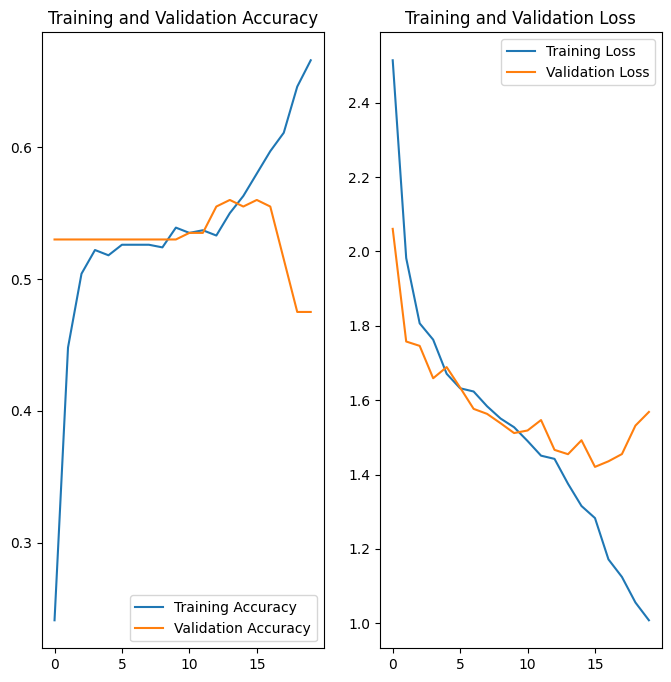

In [193]:
plot_acuracy_loss(history)

Funcionou melhor que com um dropout superior o que pode indicar que com valores mais altos pode ser bom para este tipo de problemas. Apesar ter melhores resultados após 18 iterações, acabou por acontecer o _overfit_ no final. Melhores resultados com 0.1 do que com 0.01.

## Adicionar regularização L2 
Em cima do dropout

### L2 0.01

In [25]:
kernel_regularizer = tf.keras.regularizers.L2(0.01)

In [195]:
l2_dropout_model = Sequential([
  layers.Input(shape=(128, 128, 3)),
  layers.Conv2D(32, 3, padding='same', activation='relu',  kernel_regularizer=kernel_regularizer),
  layers.MaxPooling2D(),
  layers.Dropout(0.1),
  layers.Conv2D(64, 3, padding='same', activation='relu', kernel_regularizer=kernel_regularizer),
  layers.MaxPooling2D(),
  layers.Dropout(0.1),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dropout(0.1),
  layers.Dense(32, activation='relu'),
  layers.Dropout(0.1),
  layers.Dense(9, activation='softmax')
])
l2_dropout_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
l2_dropout_model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_39 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_39 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_40 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_17 (Flatten)            │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 64)             │     4,194,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 9)              │           297 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,216,137 (16.08 MB)

 Trainable params: 4,216,137 (16.08 MB)

 Non-trainable params: 0 (0.00 B)

In [197]:
epochs=20
history = l2_dropout_model.fit(
  resized_ds_train,
  validation_data=resized_ds_val,
  epochs=epochs
)

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 37s 4s/step - accuracy: 0.2992 - loss: 3.0113 - val_accuracy: 0.5300 - val_loss: 2.3205
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 33s 4s/step - accuracy: 0.4956 - loss: 2.2256 - val_accuracy: 0.5300 - val_loss: 2.0307
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 34s 4s/step - accuracy: 0.5254 - loss: 2.0464 - val_accuracy: 0.5300 - val_loss: 2.0457
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 32s 4s/step - accuracy: 0.5345 - loss: 1.9509 - val_accuracy: 0.5300 - val_loss: 2.0225
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 44s 4s/step - accuracy: 0.5362 - loss: 1.9237 - val_accuracy: 0.5300 - val_loss: 2.0602
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 39s 4s/step - accuracy: 0.5401 - loss: 1.8906 - val_accuracy: 0.5300 - val_loss: 1.9954
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 32s 4s/step - accuracy: 0.5332 - loss: 1.8674 - val_accuracy: 0.5300 - val_loss: 1.8362
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 33s 4s/step - accuracy: 0.5386 - loss: 1.7879 - val_accuracy: 0.5300 - val_loss: 1.8154
Epoch 9/

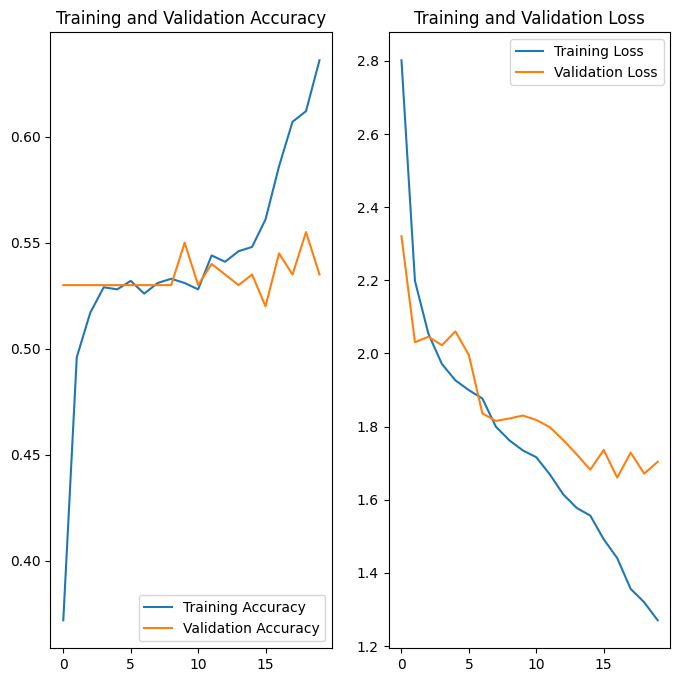

In [198]:
plot_acuracy_loss(history)

Conseguiu corrigir o overfit que aconteceu no final do último treino, no entanto ainda se mantém o gap relevante entre a loss da validação e a loss de treino. Parece que com mais epochs seria possível ir melhorando o modelo.

### L2 0.001

In [203]:
kernel_regularizer_v2 = tf.keras.regularizers.L2(0.001)

In [204]:
l2_dropout_model_v2 = Sequential([
  layers.Input(shape=(128, 128, 3)),
  layers.Conv2D(32, 3, padding='same', activation='relu',  kernel_regularizer=kernel_regularizer_v2),
  layers.MaxPooling2D(),
  layers.Dropout(0.1),
  layers.Conv2D(64, 3, padding='same', activation='relu', kernel_regularizer=kernel_regularizer_v2),
  layers.MaxPooling2D(),
  layers.Dropout(0.1),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dropout(0.1),
  layers.Dense(32, activation='relu'),
  layers.Dropout(0.1),
  layers.Dense(9, activation='softmax')
])
l2_dropout_model_v2.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
l2_dropout_model_v2.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_43 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_43 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_44 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_19 (Flatten)            │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 64)             │     4,194,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 9)              │           297 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,216,137 (16.08 MB)

 Trainable params: 4,216,137 (16.08 MB)

 Non-trainable params: 0 (0.00 B)

In [205]:
epochs=20
history = l2_dropout_model_v2.fit(
  resized_ds_train,
  validation_data=resized_ds_val,
  epochs=epochs
)

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 37s 4s/step - accuracy: 0.1265 - loss: 2.9935 - val_accuracy: 0.5300 - val_loss: 1.9972
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 39s 4s/step - accuracy: 0.4707 - loss: 1.9833 - val_accuracy: 0.5300 - val_loss: 1.9070
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step - accuracy: 0.5068 - loss: 1.8698 - val_accuracy: 0.5300 - val_loss: 1.7660
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 34s 4s/step - accuracy: 0.5320 - loss: 1.7868 - val_accuracy: 0.5300 - val_loss: 1.7559
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 39s 5s/step - accuracy: 0.5302 - loss: 1.7318 - val_accuracy: 0.5300 - val_loss: 1.7235
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 36s 4s/step - accuracy: 0.5280 - loss: 1.6942 - val_accuracy: 0.5300 - val_loss: 1.7175
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 39s 4s/step - accuracy: 0.5376 - loss: 1.6883 - val_accuracy: 0.5300 - val_loss: 1.7052
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 42s 4s/step - accuracy: 0.5328 - loss: 1.7037 - val_accuracy: 0.5300 - val_loss: 1.7206
Epoch 9/

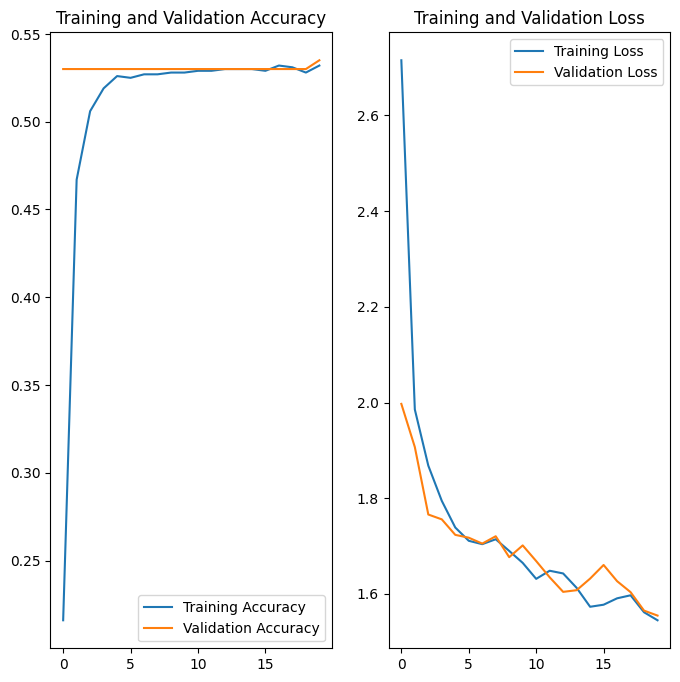

In [206]:
plot_acuracy_loss(history)

A loss entre validação e treino melhorou, já não acontece o ligeiro overfit no final, no entanto foi à custa de uma perda na accuracy e de uma não mudança nos dados de validação. A normalização está envolvida com o cálculos dos pesos, pelo que pode estar a atrasar a atualização dos mesmos para valores que permitem extrair padrões significativos dos dados.

## Iteração do modelo de acordo com o que foi aprendido

1. Para conv layers utilizar até 0.2 de dropout for conv layers e 0.5 para dense connected layers:  [here](https://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf)

### Based on simplest CNN

In [32]:
cnn_model_final_2 = Sequential([
  layers.Input(shape=(128, 128, 3)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(9, activation='softmax')
])
cnn_model_final_2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
cnn_model_final_2.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 9)              │     1,179,657 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,180,553 (4.50 MB)

 Trainable params: 1,180,553 (4.50 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
epochs=20
history = cnn_model_final_2.fit(
  resized_ds_train,
  validation_data=resized_ds_val,
  epochs=epochs
)

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.3258 - loss: 5.8612 - val_accuracy: 0.5160 - val_loss: 3.4213
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.5309 - loss: 3.1274 - val_accuracy: 0.1780 - val_loss: 2.4518
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.4795 - loss: 2.0241 - val_accuracy: 0.5120 - val_loss: 1.6377
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.6185 - loss: 1.3046 - val_accuracy: 0.5220 - val_loss: 1.5392
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.6360 - loss: 1.1096 - val_accuracy: 0.5180 - val_loss: 1.5119
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.7149 - loss: 0.9212 - val_accuracy: 0.5240 - val_loss: 1.4521
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.8029 - loss: 0.7195 - val_accuracy: 0.5080 - val_loss: 1.4613
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.8721 - loss: 0.5500 - val_accuracy: 0.5120 - val_loss: 1.4414
Epoch 9/

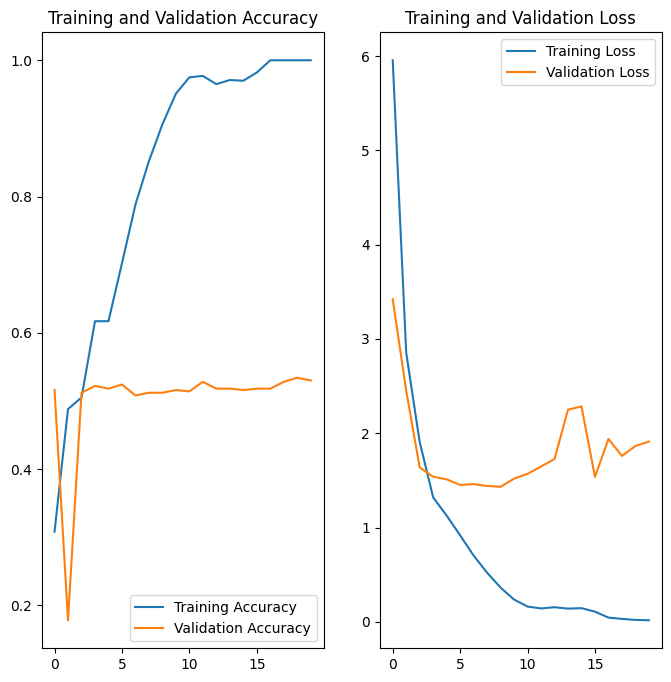

In [35]:
plot_acuracy_loss(history)

Escolhido o modelo mais simples que era o que demonstrava logo o overfit e tentei usar o dropout para que esse overfit não fosse tão sentido. No entanto a loss continua com bastante diferença entre validation e training pelo que o modelo não está otimizado para o problema. O facto da validação estar na volta dos 50% e a maior parte do dataset conter imagens com classificador negativo, dá a entender que o modelo possa estar a errar as outras classes enquanto que acerta os negativos.

# A utilidade do modelo criado

## Prever para os dados de teste

In [40]:
loss, acc = cnn_model_final_2.evaluate(resized_ds_test)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 321ms/step - accuracy: 0.4618 - loss: 2.0868


In [43]:
print(f'Model metrics on test set: \nLoss: {loss} \nAccuracy: {acc}')

Model metrics on test set: 
Loss: 2.0841617584228516 
Accuracy: 0.4699999988079071


In [46]:
for image, label in resized_ds_test:
    prediction = cnn_model_final_2.predict(image)
    predicted_class = tf.argmax(prediction, axis=1).numpy()
    print("True label:", label.numpy())
    print("Predicted label:", predicted_class)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 192ms/step
True label: [0 8 6 5 8 8 5 5 8 8 6 1 5 0 8 8 3 4 8 8 0 8 2 8 1 8 4 1 8 6 8 8 6 5 8 8 8
 4 8 7 7 3 8 8 7 3 0 8 2 0 3 8 8 6 5 8 1 1 8 6 7 7 8 3 8 8 8 2 3 1 8 8 8 0
 7 0 3 8 8 2 8 8 8 3 3 1 2 3 8 8 8 6 6 4 8 4 8 6 6 8 0 6 8 3 5 8 8 2 5 0 1
 4 8 7 0 8 8 0 6 8 8 8 3 3 8 2 5 8]
Predicted label: [8 8 8 8 8 8 8 8 8 8 8 8 8 4 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 0 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 7 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 5 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step 
True label: [8 8 3 8 3 8 2 0 2 0 4 8 4 8 8 2 8 8 0 3 8 6 8 7 8 8 7 8 1 0 8 5 1 7 0 8 8
 8 2 8 7 8 8 7 7 8 8 8 8 8 1 4 1 8 0 6 8 8 8 8 8 8 0 8 8 8 8 8 2 0 0 0]
Predicted label: [8 8 8 8 8 8 8 8 8 8 8 8 8 8 4 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 1 8 8 8 8 8 8 8 8 8]


Como é possível observar o modelo não é muito útil para resolver o problema de multiclass pois apenas prevê uma classe ("Negativo") várias vezes. Isto é resultado do treino ser um modelo que é overfitted. A accuracy é muito semelhante à obtida pela validação durante o treino.

# Trabalho Futuro

Num futuro próximo o overfit deveria ser corrigido, inicialmente dando mais dados para traino e validação. A proporção de labels não está equi-distribuida por isso trabalho de pré-processamento de dados pode ser extendido para tornar o dataset balanceado. Isto seriam as primeiras abordagens a ter em conta. Se mesmo assim o modelo estiver a fazer overfit, seria melhor estudar outros valores para normalização (dropout com um range de valores) ou então outras normalizações (como L1). Treinar por mais epochs será útil para modelos que incluem normalizações como L1 ou L2.

Num futuro a médio prazo seria interessante pegar neste modelo e aplicar a um conjunto de fotos pessoais ou até mesmo da nossa flora (portuguesa). Para fotos pessoais seria interessante modificar o output do modelo e transformar um problema multiclass num problema binário em que seria apenas previsto se existe erva daninha ou não. Numa perspectiva portuguesa poderia ser recolhida um conjunto de amostras tal como foi feito o estudo que deu origem a este dataset.